In [35]:
import pandas as pd  

trip_2019 = pd.read_csv('E-Scooter_Trips_-_2019_Pilot.csv')
trip_2020 = pd.read_csv('E-Scooter_Trips_-_2020.csv')
#trip = pd.read_csv('test.csv')


In [36]:
trip_2020 = trip_2020.dropna(axis=0, how='any')
trip_2020 = trip_2020.reset_index()
trip_2019 = trip_2019.dropna(axis=0, how='any')
trip_2019 = trip_2019.reset_index()
trip = pd.concat([trip_2019, trip_2020], join='inner')
trip = trip.dropna(axis=0, how='any')
data = trip.reset_index()

In [37]:
data.head()

,level_0,index,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
0,0,10291,0dd95046-1bc8-4464-ba39-7f9e92c668b3,08/06/2019 06:00:00 PM,08/06/2019 06:00:00 PM,1004,236,20.0,20.0,HERMOSA,HERMOSA,41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613)
1,1,10293,6819df6a-9623-4ae0-b1d3-ec617197d229,07/08/2019 04:00:00 PM,07/08/2019 05:00:00 PM,9124,3182,15.0,19.0,PORTAGE PARK,BELMONT CRAGIN,41.949592,-87.761958,POINT (-87.7619580301513 41.9495915671753),41.920143,-87.760827,POINT (-87.7608269556143 41.920143229102)
2,2,10342,aa71bb53-3e7f-4964-b6e6-030800419346,08/10/2019 09:00:00 PM,08/10/2019 09:00:00 PM,502,97,27.0,27.0,EAST GARFIELD PARK,EAST GARFIELD PARK,41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253),41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253)
3,3,10367,5d256770-1a8a-5e20-8f78-316d1819f46b,06/25/2019 07:00:00 PM,06/25/2019 08:00:00 PM,5053,2167,22.0,19.0,LOGAN SQUARE,BELMONT CRAGIN,41.921126,-87.699754,POINT (-87.6997540616386 41.9211256768265),41.927819,-87.751362,POINT (-87.7513623675995 41.9278186319205)
4,4,10369,dffe5324-5f6f-48e7-9edf-d51876ba7d2f,09/19/2019 08:00:00 AM,09/19/2019 08:00:00 AM,790,111,19.0,20.0,BELMONT CRAGIN,HERMOSA,41.935218,-87.744389,POINT (-87.7443888733072 41.9352176386575),41.927852,-87.735628,POINT (-87.7356282729632 41.9278522690551)


In [38]:
cls_data = data[['End Time','End Community Area Name']]
cls_data['End Time'] = pd.to_datetime(cls_data['End Time'],errors = 'coerce',infer_datetime_format=True,utc=True)
cls_data['date']=cls_data['End Time'].dt.date
cls_data['hour_of_day'] = cls_data['End Time'].dt.hour
cls_data['day_of_week'] = cls_data['End Time'].dt.dayofweek
cls_data['count'] = 1
cls_data.head()

<ipython-input-38-1f3bf981809a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_data['End Time'] = pd.to_datetime(cls_data['End Time'],errors = 'coerce',infer_datetime_format=True,utc=True)
<ipython-input-38-1f3bf981809a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_data['date']=cls_data['End Time'].dt.date
<ipython-input-38-1f3bf981809a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,End Time,End Community Area Name,date,hour_of_day,day_of_week,count
0,2019-08-06 18:00:00+00:00,HERMOSA,2019-08-06,18,1,1
1,2019-07-08 17:00:00+00:00,BELMONT CRAGIN,2019-07-08,17,0,1
2,2019-08-10 21:00:00+00:00,EAST GARFIELD PARK,2019-08-10,21,5,1
3,2019-06-25 20:00:00+00:00,BELMONT CRAGIN,2019-06-25,20,1,1
4,2019-09-19 08:00:00+00:00,HERMOSA,2019-09-19,8,3,1


In [39]:
hours = pd.get_dummies(cls_data['hour_of_day'])
hours = pd.concat([cls_data['End Community Area Name'],hours],axis =1)
hours = hours.groupby('End Community Area Name').sum()
hours.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
End Community Area Name,,,,,,,,,,,,,,,,,,,,,
ALBANY PARK,1.0,0.0,0.0,0.0,0.0,18.0,16.0,29.0,46.0,84.0,...,190.0,242.0,270.0,291.0,265.0,295.0,244.0,224.0,48.0,1.0
ARCHER HEIGHTS,2.0,0.0,0.0,0.0,0.0,31.0,20.0,58.0,116.0,49.0,...,131.0,212.0,234.0,307.0,306.0,310.0,270.0,196.0,79.0,12.0
ARMOUR SQUARE,0.0,0.0,0.0,0.0,0.0,4.0,9.0,16.0,21.0,46.0,...,143.0,194.0,209.0,260.0,296.0,295.0,317.0,302.0,124.0,12.0
ASHBURN,1.0,0.0,0.0,0.0,0.0,6.0,12.0,14.0,30.0,34.0,...,103.0,109.0,141.0,183.0,216.0,167.0,154.0,92.0,16.0,4.0
AUBURN GRESHAM,5.0,0.0,0.0,0.0,0.0,41.0,57.0,65.0,112.0,162.0,...,373.0,454.0,521.0,549.0,577.0,542.0,469.0,302.0,99.0,23.0


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
S =[]
for n_clusters in range(2,15):
    clusterer = KMeans(n_clusters = n_clusters,random_state=10)
    cluster_labels = clusterer.fit_predict(hours)
    silhouette_avg = silhouette_score(hours,cluster_labels)
    S.append(silhouette_avg)
    print("for n_cluster =", n_clusters,"the average silhouette_score is :", silhouette_avg)

for n_cluster = 2 the average silhouette_score is : 0.9150838030565277
for n_cluster = 3 the average silhouette_score is : 0.9129377977881319
for n_cluster = 4 the average silhouette_score is : 0.9010795415422743
for n_cluster = 5 the average silhouette_score is : 0.6731872740137694
for n_cluster = 6 the average silhouette_score is : 0.6505502775102568
for n_cluster = 7 the average silhouette_score is : 0.6266021990922732
for n_cluster = 8 the average silhouette_score is : 0.5113664682462515
for n_cluster = 9 the average silhouette_score is : 0.5085403272367199
for n_cluster = 10 the average silhouette_score is : 0.4778651425624539
for n_cluster = 11 the average silhouette_score is : 0.5112771923268719
for n_cluster = 12 the average silhouette_score is : 0.494651116793601
for n_cluster = 13 the average silhouette_score is : 0.42850864822230034
for n_cluster = 14 the average silhouette_score is : 0.4364547388053748


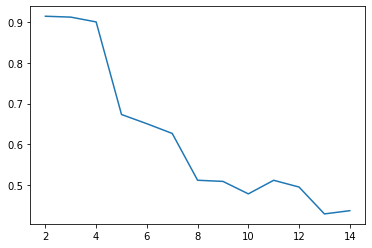

In [42]:
plt.plot(range(2,15),S)

In [43]:
km=KMeans(random_state=10,n_clusters=4)
res=km.fit(hours)
label=res.labels_
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1]


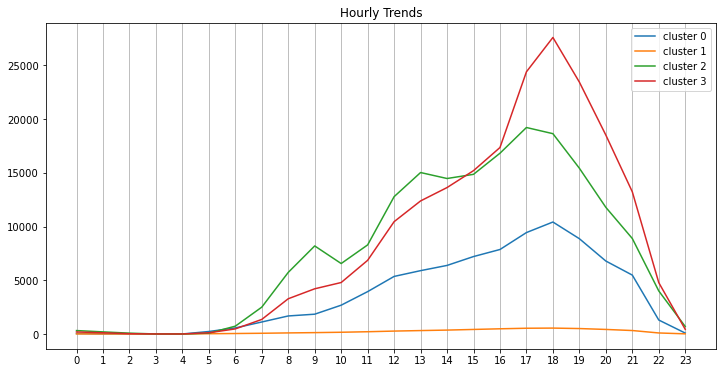

In [44]:
hourCenters = pd.DataFrame(res.cluster_centers_)
hourCenters.T.plot(figsize=(12,6))
plt.legend(['cluster 0','cluster 1','cluster 2','cluster 3'])
plt.title('Hourly Trends')
plt.xticks(hourCenters.columns)
plt.grid(axis='x')
plt.show()

In [46]:
days = pd.get_dummies(cls_data['day_of_week'])
days = pd.concat([cls_data['End Community Area Name'],days],axis=1)
days = days.groupby('End Community Area Name').sum()
days['cluster'] = res.labels_
days.head()

,0,1,2,3,4,5,6,cluster
End Community Area Name,,,,,,,,
ALBANY PARK,387.0,322.0,413.0,357.0,477.0,452.0,411.0,1
ARCHER HEIGHTS,388.0,388.0,394.0,310.0,424.0,400.0,497.0,1
ARMOUR SQUARE,340.0,226.0,306.0,248.0,370.0,479.0,583.0,1
ASHBURN,163.0,165.0,212.0,232.0,239.0,273.0,280.0,1
AUBURN GRESHAM,710.0,601.0,804.0,772.0,874.0,840.0,863.0,1


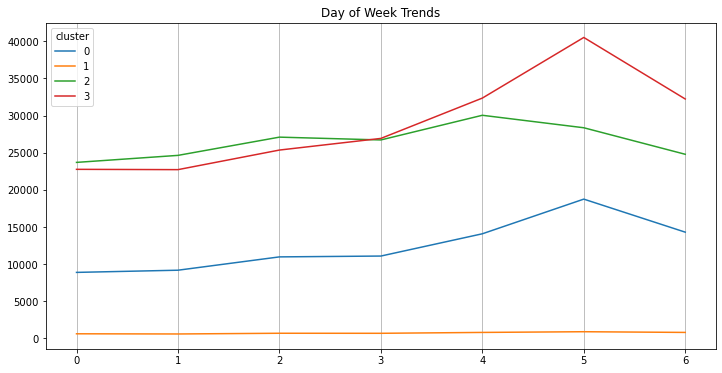

In [47]:
dayOfWeek_mean = days.groupby(['cluster']).mean()
dayOfWeek_mean.T.plot(figsize=(12,6))
plt.title('Day of Week Trends')
plt.grid(axis='x')
plt.show()

In [52]:
cls_data = data[['End Time','End Community Area Name','Trip Distance','Trip Duration']]
cls_data['End Time'] =pd.to_datetime(cls_data['End Time'],errors = 'coerce',infer_datetime_format =True,utc=True)
cls_data['date']=cls_data['End Time'].dt.date
cls_data['day_of_week']=cls_data['End Time'].dt.hour
cls_data['count']=1
cls_data.head()

<ipython-input-52-734a8990da59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_data['End Time'] =pd.to_datetime(cls_data['End Time'],errors = 'coerce',infer_datetime_format =True,utc=True)
<ipython-input-52-734a8990da59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_data['date']=cls_data['End Time'].dt.date
<ipython-input-52-734a8990da59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,End Time,End Community Area Name,Trip Distance,Trip Duration,date,day_of_week,count
0,2019-08-06 18:00:00+00:00,HERMOSA,1004,236,2019-08-06,18,1
1,2019-07-08 17:00:00+00:00,BELMONT CRAGIN,9124,3182,2019-07-08,17,1
2,2019-08-10 21:00:00+00:00,EAST GARFIELD PARK,502,97,2019-08-10,21,1
3,2019-06-25 20:00:00+00:00,BELMONT CRAGIN,5053,2167,2019-06-25,20,1
4,2019-09-19 08:00:00+00:00,HERMOSA,790,111,2019-09-19,8,1


In [53]:
dist = cls_data[['End Community Area Name','Trip Distance']]
dist = dist.groupby('End Community Area Name').sum()
dist['cluster']=res.labels_
dist.head()

,Trip Distance,cluster
End Community Area Name,,
ALBANY PARK,10279936,1
ARCHER HEIGHTS,7565996,1
ARMOUR SQUARE,8296058,1
ASHBURN,6925201,1
AUBURN GRESHAM,19860057,1


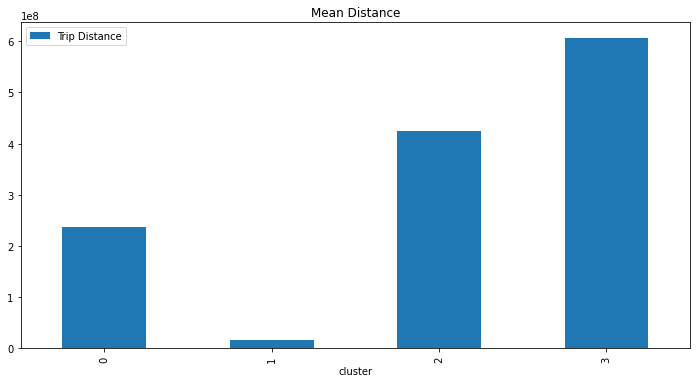

In [56]:
dist_mean = dist.groupby(['cluster']).mean()
dist_mean.plot.bar(figsize=(12,6))
plt.title('Mean Distance')
plt.show()

In [59]:
cls_data = data[['End Time','End Community Area Name','Trip Distance','Trip Duration']]
dura = cls_data[['End Community Area Name','Trip Duration']]
dura = dura.groupby('End Community Area Name').sum()
dura['cluster']=res.labels_
dura.head()

,Trip Duration,cluster
End Community Area Name,,
ALBANY PARK,3009804,1
ARCHER HEIGHTS,3461160,1
ARMOUR SQUARE,3843682,1
ASHBURN,2563722,1
AUBURN GRESHAM,9798353,1


Text(0.5, 1.0, 'Mean Duration')

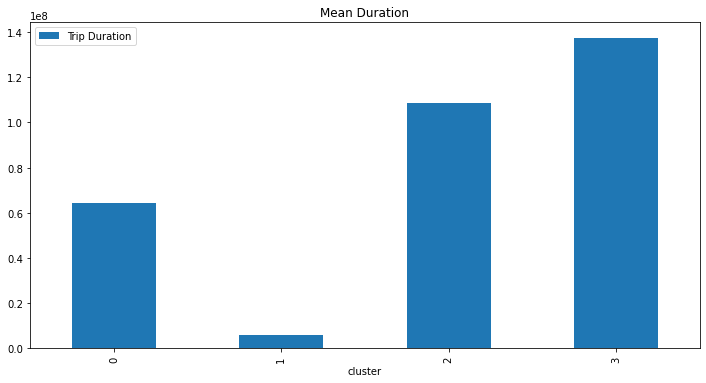

In [62]:
dura_mean = dura.groupby('cluster').mean()
dura_mean.plot.bar(figsize=(12,6))
plt.title('Mean Duration')


In [79]:
#visualizePartitionShape()
dura[dura['cluster']==0]

,Trip Duration,cluster
End Community Area Name,,
LAKE VIEW,66964573,0
LINCOLN PARK,61928698,0
LOGAN SQUARE,63589398,0


In [81]:
dura[dura['cluster']==1]

,Trip Duration,cluster
End Community Area Name,,
ALBANY PARK,3009804,1
ARCHER HEIGHTS,3461160,1
ARMOUR SQUARE,3843682,1
ASHBURN,2563722,1
AUBURN GRESHAM,9798353,1
...,...,...
WEST GARFIELD PARK,4431895,1
WEST LAWN,5277738,1
WEST PULLMAN,5443752,1


In [82]:
dura[dura['cluster']==2]

,Trip Duration,cluster
End Community Area Name,,
NEAR WEST SIDE,108447066,2


In [83]:
dura[dura['cluster']==3]

,Trip Duration,cluster
End Community Area Name,,
WEST TOWN,137413889,3
